# Import Libraries and Dataset

In [26]:
import pandas as pd
import missingno as mg

from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import math
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
file_path = 'Titanic-Dataset.csv.xls'
df = pd.read_csv(file_path)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
def plot_distribution(df):
    '''
    Description:
    Plot distribution charts (histograms with KDE) for all numerical features of a given Pandas DataFrame.

    Parameters: df (pd.DataFrame): The input DataFrame.

    Returns: None
    '''
    numerical_features = [col 
                          for col 
                          in df.columns 
                          if pd.api.types.is_numeric_dtype(df[col])]
    print(f'The number of numerical features is {len(numerical_features)}')
    
    # Distribution of numerical variables
    nrows = math.ceil(len(numerical_features) / 3)
    ncols = 3
    
    fig, axes = plt.subplots(nrows=nrows, 
                             ncols=ncols, 
                             figsize=(13, 3 * nrows))  # Adjust height for better spacing
    axes = axes.flatten()
    
    for i, col in enumerate(numerical_features):
        sns.histplot(df[col], 
                     kde=True, 
                     ax=axes[i])
        axes[i].set_title(f'Distribution of {col}')
    
    # Remove any empty subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    fig.suptitle('Distribution plots of the dataset', fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.98])
    plt.show()

# Function to plot correlation matrix of numerical features of pandas dataframe.
def plot_correlation(df):
    '''
    Description:
    Plot a heatmap of the correlation matrix for all numerical features of a given Pandas DataFrame.

    Parameters: df (pd.DataFrame): The input DataFrame.

    Returns: None
    '''
    numerical_features = [col 
                          for col 
                          in df.columns 
                          if pd.api.types.is_numeric_dtype(df[col])]

    # Plotting the heatmap
    correlation_matrix = df[numerical_features].corr()

    plt.figure(figsize=(10, 6))
    sns.heatmap(correlation_matrix, 
                annot=True, 
                cmap='coolwarm', 
                fmt='.2f', 
                linewidths=.5)
    plt.title('Correlation Matrix')
    plt.show()

# Exploratory Data Analysis

<Axes: >

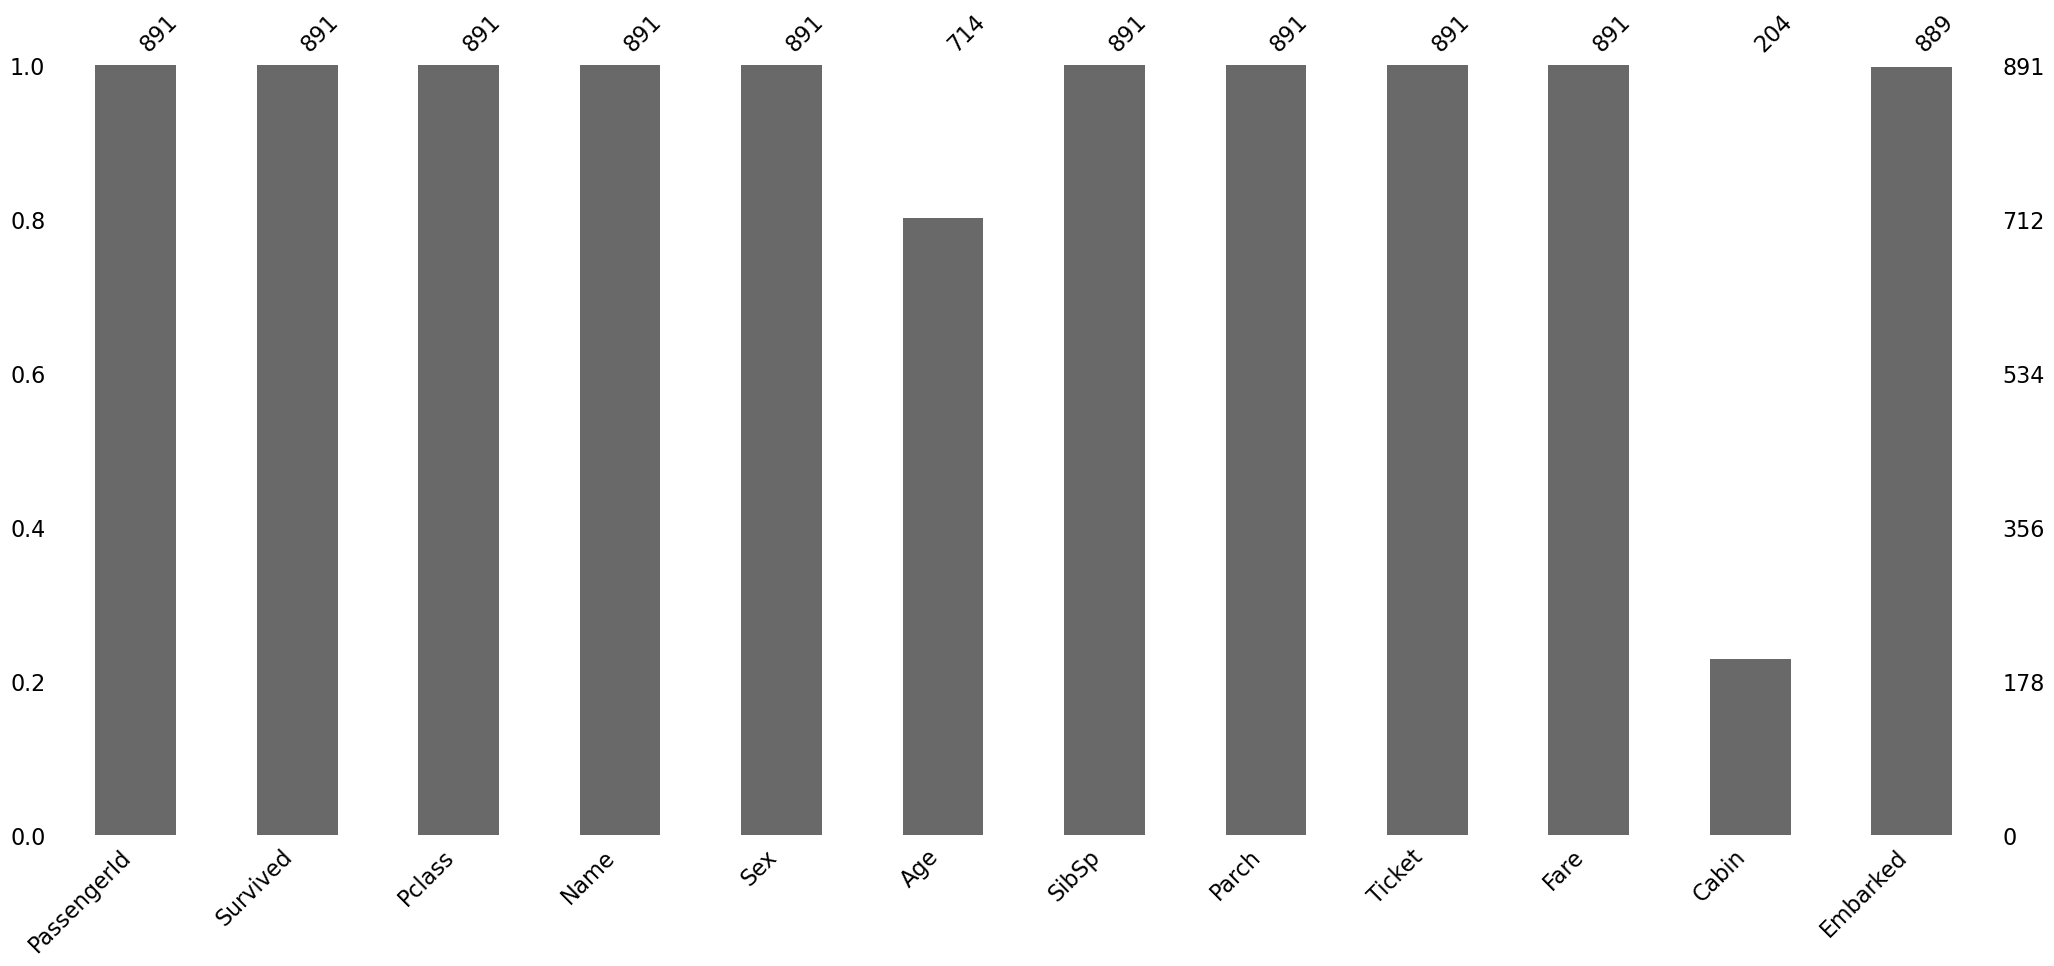

In [15]:
mg.bar(df)

In [16]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

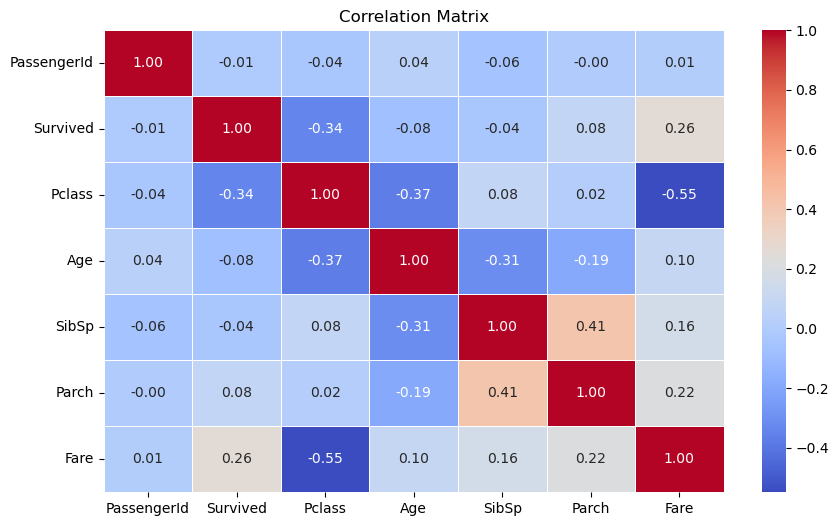

In [17]:
plot_correlation(df)

The number of numerical features is 7


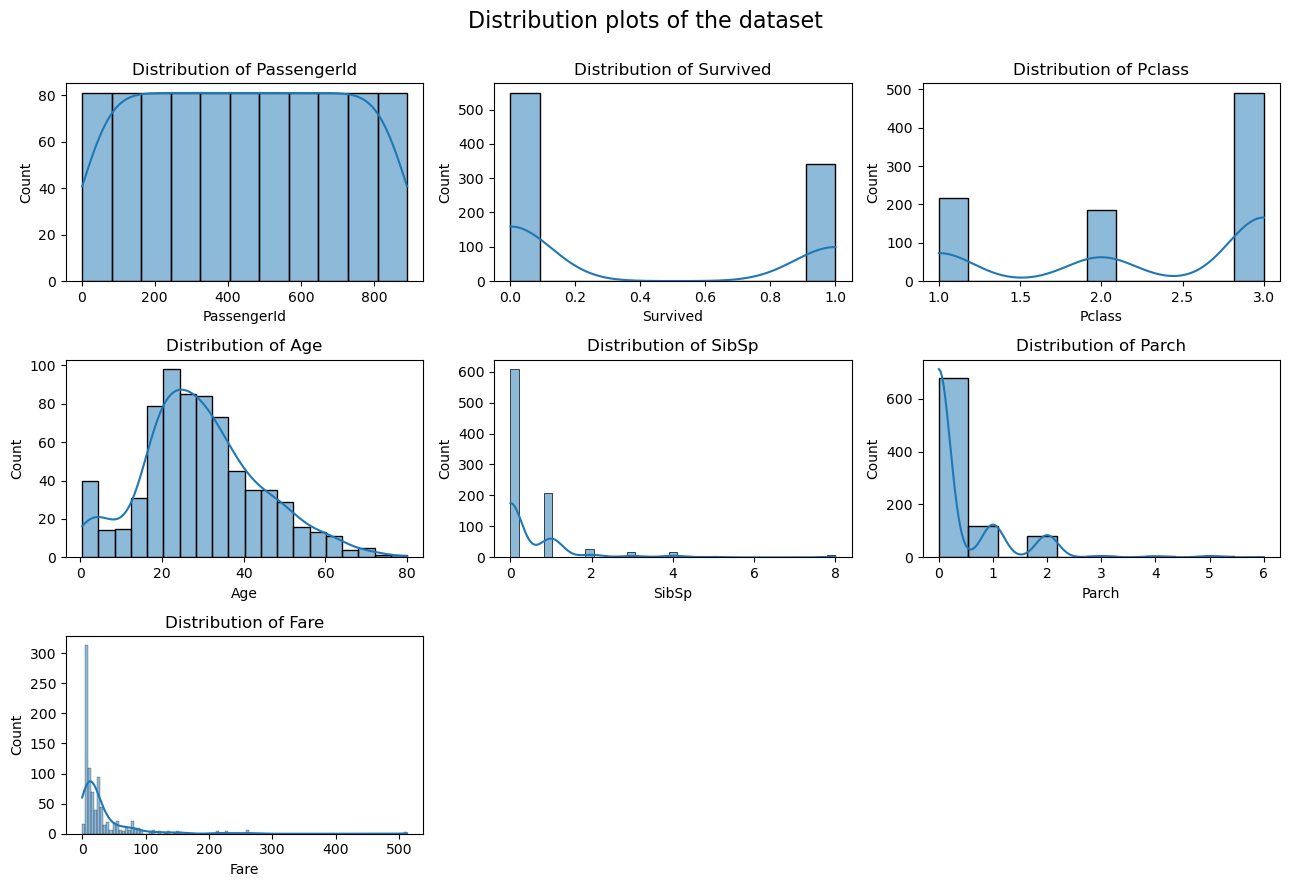

In [18]:
plot_distribution(df)

# Pre-processing of Dataset

In [19]:
# Drop Cabin variable since it has many missing values
df_cleaned = df.drop(['Cabin', 'Ticket', 'Name'], axis=1)

In [20]:
# Fill missing values in Age and Embarked variable
df_cleaned['Age'].fillna(df_cleaned['Age'].median(), inplace=True)

df_cleaned['Embarked'].fillna(df_cleaned['Embarked'].mode()[0], inplace=True)

/var/folders/ht/ptxmbzwn0px6gzhsyfc1qpww0000gn/T/ipykernel_4806/1041274395.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['Age'].fillna(df_cleaned['Age'].median(), inplace=True)
/var/folders/ht/ptxmbzwn0px6gzhsyfc1qpww0000gn/T/ipykernel_4806/1041274395.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are set

In [21]:
# Convert categorical variables to numericals by Applying Label Encoding
categorical_cols = ['Sex','Embarked']

# Apply Label Encoding
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_cleaned[col] = le.fit_transform(df_cleaned[col])
    label_encoders[col] = le


In [22]:
df_cleaned.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2


Variable "Survived" is the target variable

# Split Dataset

In [23]:
# Split into features and Target
X = df_cleaned.drop('Survived', axis=1)
y = df_cleaned['Survived']

# Split into train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.20, stratify=y)


# Build model and Evaluate

In [24]:
# Build and train the Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

In [27]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.8156424581005587
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       110
           1       0.78      0.72      0.75        69

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.82      0.81       179

Confusion Matrix:
 [[96 14]
 [19 50]]
